# Q1 

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import statsmodels.formula.api as smf
import scipy as stats

In [3]:
data=pd.read_csv('C:\\Users\\hp\\Desktop\\Data science assignment\\delivery_time.csv')
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
data1=data.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'},axis=1)

In [5]:
data1

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [6]:
data1.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [7]:
data1.tail()

,Delivery_Time,Sorting_Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [12]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [13]:
data1.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [14]:
data1.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


In [15]:
data1.agg(['skew','kurtosis']).transpose()

,skew,kurtosis
Delivery_Time,0.352390,0.317960
Sorting_Time,0.047115,-1.148455


In [17]:
data_log=np.log(data1)
data_log

,Delivery_Time,Sorting_Time
0,3.044522,2.302585
1,2.602690,1.386294
2,2.983153,1.791759
3,3.178054,2.197225
4,3.367296,2.302585
5,2.731115,1.791759
6,2.944439,1.945910
7,2.251292,1.098612
8,2.884801,2.302585
9,2.931194,2.197225


#  Before applying log

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery_Time', ylabel='Density'>

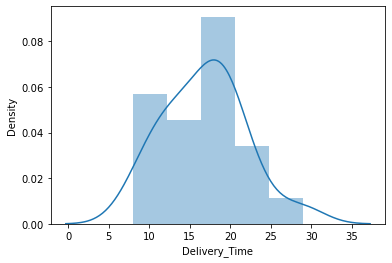

In [19]:
sns.distplot(data1['Delivery_Time'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

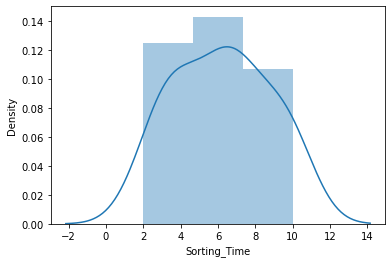

In [20]:
sns.distplot(data1['Sorting_Time'])

# After applying log

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery_Time', ylabel='Density'>

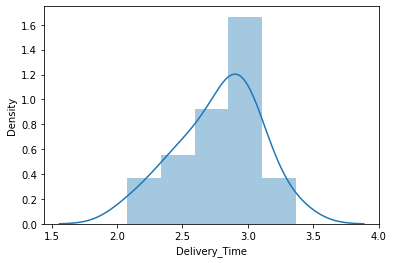

In [22]:
sns.distplot(data_log['Delivery_Time'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

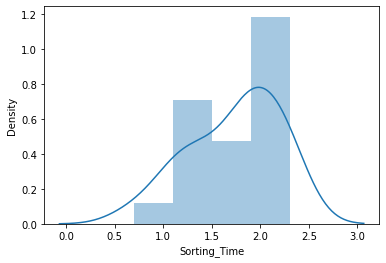

In [23]:
sns.distplot(data_log['Sorting_Time'])

In [24]:
### Linear Regression
X=data_log[['Sorting_Time']].values
Y=data_log[['Delivery_Time']].values

In [25]:
model=smf.ols('Y~X',data=data_log).fit()

<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

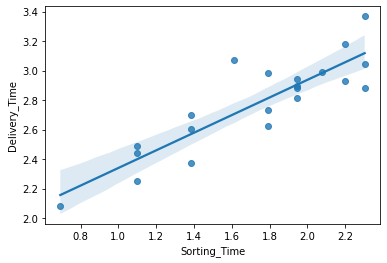

In [26]:
sns.regplot(x='Sorting_Time',y='Delivery_Time',data=data_log)

In [27]:
## Coefficients
model.params

Intercept    1.741987
X            0.597522
dtype: float64

In [28]:
## t value and p value
print(model.tvalues, '\n',model.pvalues)

Intercept    13.085552
X             8.024484
dtype: float64 
 Intercept    5.921137e-11
X            1.601539e-07
dtype: float64


In [ ]:
# R squared values
model.rsquared,model.rsquared_adj

In [31]:
##  Predicting the new data point
newdata=pd.Series([4,8])

In [32]:
data_pred=pd.DataFrame(newdata,columns=['X'])

In [33]:
model.predict(data_pred)

0    4.132076
1    6.522166
dtype: float64

# Q2

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import statsmodels.formula.api as smf
import scipy as stats

In [3]:
data=pd.read_csv('C:\\Users\\hp\\Desktop\\Data science assignment\\Salary_Data.csv')
data

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [5]:
data1=data.rename({'YearsExperience':'Years_Experience'},axis=1)
data1

,Years_Experience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Years_Experience  30 non-null     float64
 1   Salary            30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [7]:
data1.head()

,Years_Experience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [8]:
data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [9]:
data1.describe()

,Years_Experience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [10]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [11]:
data.agg(['skew','kurtosis']).transpose()

,skew,kurtosis
YearsExperience,0.37956,-1.012212
Salary,0.35412,-1.295421


In [12]:
data_log=np.log(data1)
data_log

,Years_Experience,Salary
0,0.095310,10.580073
1,0.262364,10.740843
2,0.405465,10.538237
3,0.693147,10.681091
4,0.788457,10.593906
5,1.064711,10.944506
6,1.098612,11.004597
7,1.163151,10.904946
8,1.163151,11.073567
9,1.308333,10.954117


# Before applying log

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Years_Experience', ylabel='Density'>

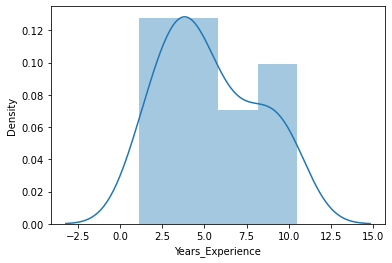

In [13]:
sns.distplot(data1['Years_Experience'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

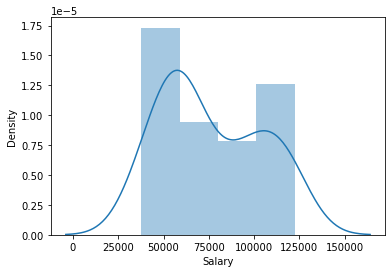

In [14]:
sns.distplot(data1['Salary'])

# After applying log

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Years_Experience', ylabel='Density'>

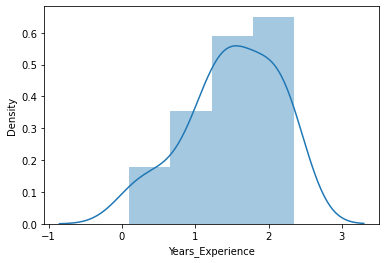

In [15]:
sns.distplot(data_log['Years_Experience'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

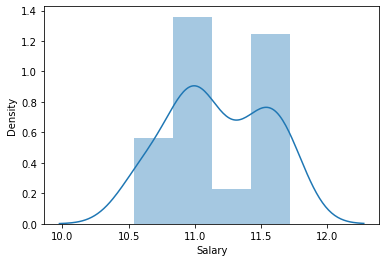

In [16]:
sns.distplot(data_log['Salary'])

In [17]:
## LINEAR REGRESSION
X=data_log[['Years_Experience']].values
Y=data_log[['Salary']].values

In [18]:
model=smf.ols('Y~X',data=data_log).fit()

<AxesSubplot:xlabel='Years_Experience', ylabel='Salary'>

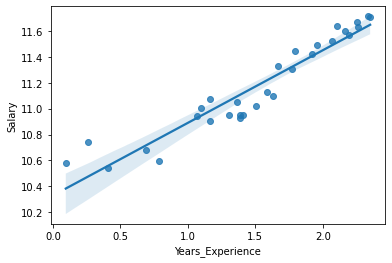

In [19]:
sns.regplot(x='Years_Experience',y='Salary',data=data_log)

In [20]:
## Coefficients
model.params

Intercept    10.328043
X             0.562089
dtype: float64

In [21]:
## T values and p values
print(model.tvalues, '\n',model.pvalues) 

Intercept    184.867959
X             16.352542
dtype: float64 
 Intercept    9.073132e-45
X            7.395278e-16
dtype: float64


In [22]:
## R squared values
(model.rsquared,model.rsquared_adj)

(0.9052150725817149, 0.9018298966024904)

In [23]:
## Predicting the new point
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [25]:
data_pred=pd.DataFrame(new_data,columns=['X'])
data_pred

,X
0,3
1,5


In [26]:
model.predict(data_pred)

0    12.014310
1    13.138487
dtype: float64